# COMP SCI 760 - Machine Learning
## Homework 6 - Q1 Part (c)
- Name: Manas Trivedi
- ID: 9085825512

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 64
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 256 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=512, out_features=1024, bias=True)
    (7): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2)
    (9): Linear(in_features=1024, out_features=784, bias=True)
    (10): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

938it [00:21, 44.35it/s]                                                        


Epoch 1 of 100
Generator loss: 9.19632530, Discriminator loss: 0.22859630


938it [00:21, 44.06it/s]                                                        


Epoch 2 of 100
Generator loss: 8.75755692, Discriminator loss: 0.11678048


938it [00:21, 44.66it/s]                                                        


Epoch 3 of 100
Generator loss: 7.57826757, Discriminator loss: 0.16432764


938it [00:21, 44.37it/s]                                                        


Epoch 4 of 100
Generator loss: 5.71302748, Discriminator loss: 0.26456833


938it [00:21, 44.26it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


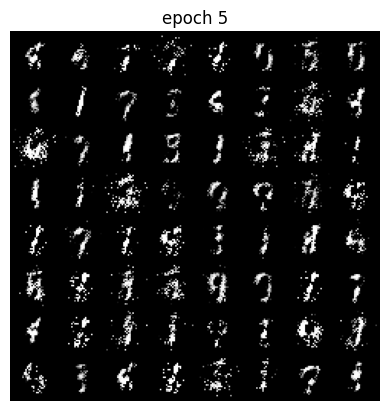

Epoch 5 of 100
Generator loss: 4.65390205, Discriminator loss: 0.36124519


938it [00:21, 44.29it/s]                                                        


Epoch 6 of 100
Generator loss: 3.71308613, Discriminator loss: 0.42547989


938it [00:21, 44.54it/s]                                                        


Epoch 7 of 100
Generator loss: 3.08088589, Discriminator loss: 0.48963922


938it [00:21, 44.61it/s]                                                        


Epoch 8 of 100
Generator loss: 2.79663825, Discriminator loss: 0.55273056


938it [00:21, 44.28it/s]                                                        


Epoch 9 of 100
Generator loss: 2.44594336, Discriminator loss: 0.62488478


938it [00:21, 44.04it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


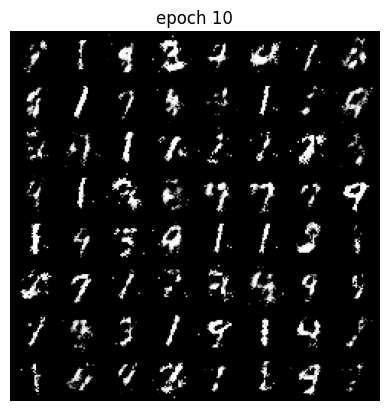

Epoch 10 of 100
Generator loss: 2.20853901, Discriminator loss: 0.70167369


938it [00:21, 44.39it/s]                                                        


Epoch 11 of 100
Generator loss: 2.09696937, Discriminator loss: 0.74400705


938it [00:21, 44.14it/s]                                                        


Epoch 12 of 100
Generator loss: 2.06496143, Discriminator loss: 0.74903089


938it [00:21, 44.32it/s]                                                        


Epoch 13 of 100
Generator loss: 1.93599772, Discriminator loss: 0.78923249


938it [00:21, 44.39it/s]                                                        


Epoch 14 of 100
Generator loss: 1.72135198, Discriminator loss: 0.87381923


938it [00:21, 44.53it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


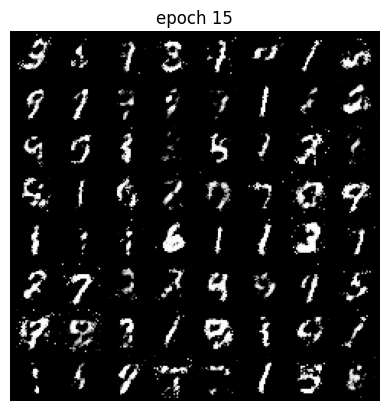

Epoch 15 of 100
Generator loss: 1.70230138, Discriminator loss: 0.88309491


938it [00:20, 44.91it/s]                                                        


Epoch 16 of 100
Generator loss: 1.66545343, Discriminator loss: 0.89510322


938it [00:20, 44.95it/s]                                                        


Epoch 17 of 100
Generator loss: 1.56233084, Discriminator loss: 0.92830598


938it [00:20, 45.16it/s]                                                        


Epoch 18 of 100
Generator loss: 1.47306097, Discriminator loss: 0.96048862


938it [00:20, 45.26it/s]                                                        


Epoch 19 of 100
Generator loss: 1.46209967, Discriminator loss: 0.98134178


938it [00:20, 45.16it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


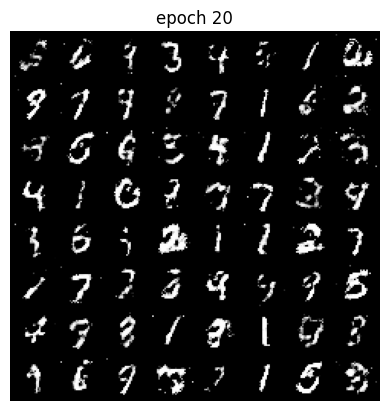

Epoch 20 of 100
Generator loss: 1.39702868, Discriminator loss: 1.01046097


938it [00:20, 45.71it/s]                                                        


Epoch 21 of 100
Generator loss: 1.34895027, Discriminator loss: 1.02454090


938it [00:20, 45.60it/s]                                                        


Epoch 22 of 100
Generator loss: 1.32700062, Discriminator loss: 1.04324043


938it [00:20, 46.33it/s]                                                        


Epoch 23 of 100
Generator loss: 1.28977656, Discriminator loss: 1.05858552


938it [00:20, 46.28it/s]                                                        


Epoch 24 of 100
Generator loss: 1.33014369, Discriminator loss: 1.04803872


938it [00:20, 46.35it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


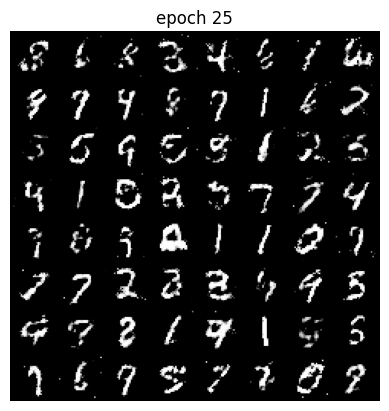

Epoch 25 of 100
Generator loss: 1.21167827, Discriminator loss: 1.09925532


938it [00:20, 45.94it/s]                                                        


Epoch 26 of 100
Generator loss: 1.23346066, Discriminator loss: 1.10272014


938it [00:20, 45.88it/s]                                                        


Epoch 27 of 100
Generator loss: 1.19609356, Discriminator loss: 1.10262609


938it [00:20, 45.94it/s]                                                        


Epoch 28 of 100
Generator loss: 1.18203688, Discriminator loss: 1.11694777


938it [00:20, 45.85it/s]                                                        


Epoch 29 of 100
Generator loss: 1.18987167, Discriminator loss: 1.11156583


938it [00:20, 46.40it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


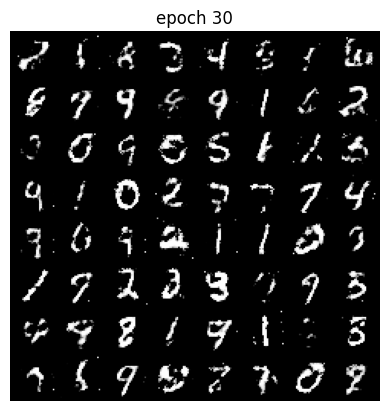

Epoch 30 of 100
Generator loss: 1.16819847, Discriminator loss: 1.12561440


938it [00:19, 46.91it/s]                                                        


Epoch 31 of 100
Generator loss: 1.14540410, Discriminator loss: 1.13324332


938it [00:20, 46.58it/s]                                                        


Epoch 32 of 100
Generator loss: 1.16117513, Discriminator loss: 1.13187993


938it [00:19, 46.93it/s]                                                        


Epoch 33 of 100
Generator loss: 1.14222181, Discriminator loss: 1.13886011


938it [00:19, 47.16it/s]                                                        


Epoch 34 of 100
Generator loss: 1.12309206, Discriminator loss: 1.14318264


938it [00:20, 46.83it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


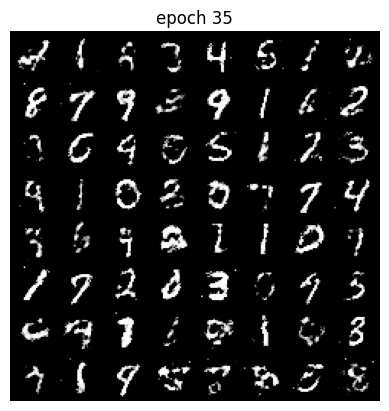

Epoch 35 of 100
Generator loss: 1.14233279, Discriminator loss: 1.14577341


938it [00:19, 47.31it/s]                                                        


Epoch 36 of 100
Generator loss: 1.12458897, Discriminator loss: 1.14916205


938it [00:20, 46.44it/s]                                                        


Epoch 37 of 100
Generator loss: 1.12210453, Discriminator loss: 1.14762104


938it [00:20, 45.39it/s]                                                        


Epoch 38 of 100
Generator loss: 1.12146437, Discriminator loss: 1.14545739


938it [00:20, 46.49it/s]                                                        


Epoch 39 of 100
Generator loss: 1.11376143, Discriminator loss: 1.15792477


938it [00:21, 43.06it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


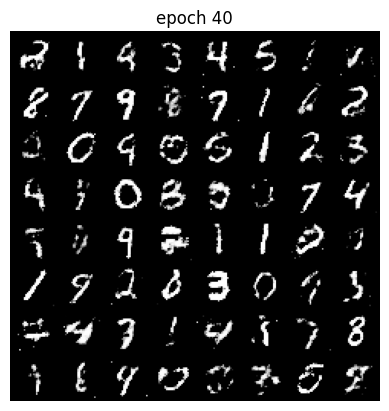

Epoch 40 of 100
Generator loss: 1.08280253, Discriminator loss: 1.16074121


938it [00:20, 45.84it/s]                                                        


Epoch 41 of 100
Generator loss: 1.09768605, Discriminator loss: 1.16032648


938it [00:20, 45.53it/s]                                                        


Epoch 42 of 100
Generator loss: 1.09420586, Discriminator loss: 1.16184437


938it [00:20, 45.88it/s]                                                        


Epoch 43 of 100
Generator loss: 1.08161771, Discriminator loss: 1.16988122


938it [00:20, 45.21it/s]                                                        


Epoch 44 of 100
Generator loss: 1.08400130, Discriminator loss: 1.16833782


938it [00:21, 44.05it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


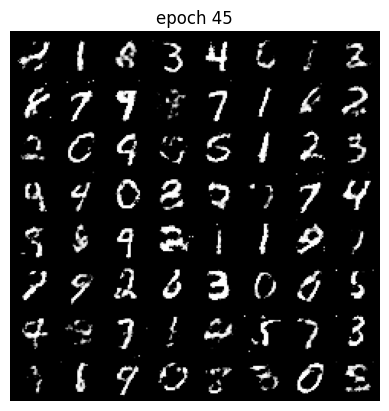

Epoch 45 of 100
Generator loss: 1.06705475, Discriminator loss: 1.17560756


938it [00:21, 43.65it/s]                                                        


Epoch 46 of 100
Generator loss: 1.05706382, Discriminator loss: 1.17770457


938it [00:20, 45.47it/s]                                                        


Epoch 47 of 100
Generator loss: 1.06339169, Discriminator loss: 1.18256390


938it [00:22, 41.12it/s]                                                        


Epoch 48 of 100
Generator loss: 1.05548787, Discriminator loss: 1.18453491


938it [00:21, 44.25it/s]                                                        


Epoch 49 of 100
Generator loss: 1.04772317, Discriminator loss: 1.18428230


938it [00:20, 46.22it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


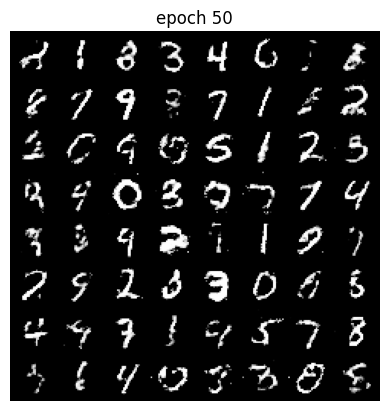

Epoch 50 of 100
Generator loss: 1.06407344, Discriminator loss: 1.18115187


938it [00:20, 45.38it/s]                                                        


Epoch 51 of 100
Generator loss: 1.02819049, Discriminator loss: 1.19523072


938it [00:19, 47.01it/s]                                                        


Epoch 52 of 100
Generator loss: 1.05663037, Discriminator loss: 1.18993688


938it [00:20, 46.22it/s]                                                        


Epoch 53 of 100
Generator loss: 1.02010310, Discriminator loss: 1.19915974


938it [00:20, 46.23it/s]                                                        


Epoch 54 of 100
Generator loss: 1.03434765, Discriminator loss: 1.19538903


938it [00:21, 43.48it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


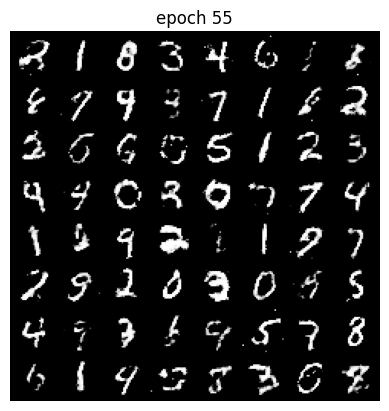

Epoch 55 of 100
Generator loss: 1.02490449, Discriminator loss: 1.20112932


938it [00:20, 45.99it/s]                                                        


Epoch 56 of 100
Generator loss: 1.02391720, Discriminator loss: 1.19719994


938it [00:19, 46.95it/s]                                                        


Epoch 57 of 100
Generator loss: 1.01067531, Discriminator loss: 1.20861781


938it [00:20, 46.49it/s]                                                        


Epoch 58 of 100
Generator loss: 1.00465417, Discriminator loss: 1.21299589


938it [00:20, 45.22it/s]                                                        


Epoch 59 of 100
Generator loss: 1.01231837, Discriminator loss: 1.20812535


938it [00:20, 45.29it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


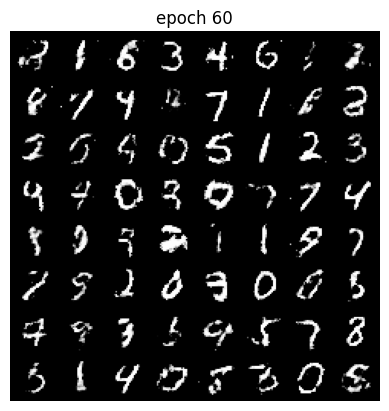

Epoch 60 of 100
Generator loss: 0.99276233, Discriminator loss: 1.21587074


938it [00:20, 46.52it/s]                                                        


Epoch 61 of 100
Generator loss: 0.99373114, Discriminator loss: 1.21634495


938it [00:20, 45.33it/s]                                                        


Epoch 62 of 100
Generator loss: 0.99227172, Discriminator loss: 1.21993744


938it [00:21, 43.41it/s]                                                        


Epoch 63 of 100
Generator loss: 0.98958236, Discriminator loss: 1.21880102


938it [00:21, 44.16it/s]                                                        


Epoch 64 of 100
Generator loss: 0.98740971, Discriminator loss: 1.22558677


938it [00:19, 47.24it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


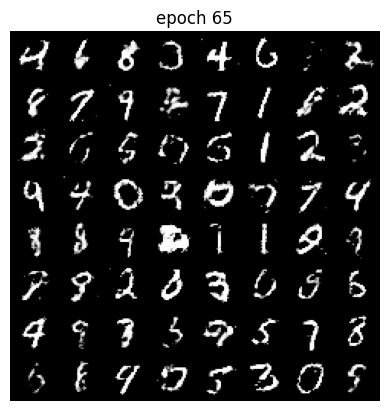

Epoch 65 of 100
Generator loss: 0.97948086, Discriminator loss: 1.22932565


938it [00:20, 44.95it/s]                                                        


Epoch 66 of 100
Generator loss: 0.98410958, Discriminator loss: 1.22417629


938it [00:21, 44.35it/s]                                                        


Epoch 67 of 100
Generator loss: 0.98005390, Discriminator loss: 1.22870195


938it [00:20, 46.16it/s]                                                        


Epoch 68 of 100
Generator loss: 0.97975057, Discriminator loss: 1.23244989


938it [00:22, 41.87it/s]                                                        


Epoch 69 of 100
Generator loss: 0.98475456, Discriminator loss: 1.22373080


938it [00:20, 45.31it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


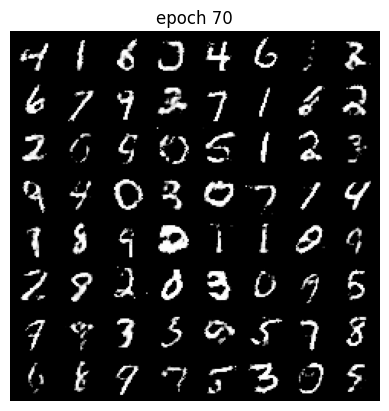

Epoch 70 of 100
Generator loss: 0.98470813, Discriminator loss: 1.22705889


938it [00:20, 45.68it/s]                                                        


Epoch 71 of 100
Generator loss: 0.97742039, Discriminator loss: 1.22915030


938it [00:22, 41.73it/s]                                                        


Epoch 72 of 100
Generator loss: 0.96905404, Discriminator loss: 1.22950816


938it [00:20, 45.01it/s]                                                        


Epoch 73 of 100
Generator loss: 0.97440302, Discriminator loss: 1.23182809


938it [00:21, 44.36it/s]                                                        


Epoch 74 of 100
Generator loss: 0.97148836, Discriminator loss: 1.22861552


938it [00:20, 45.38it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


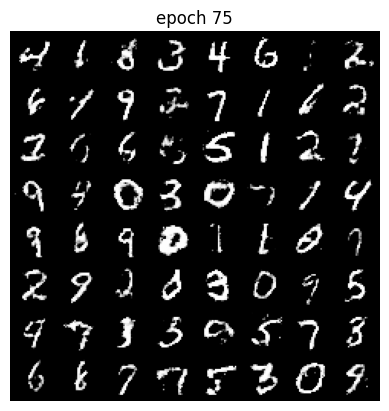

Epoch 75 of 100
Generator loss: 0.97173905, Discriminator loss: 1.23683405


938it [00:20, 45.84it/s]                                                        


Epoch 76 of 100
Generator loss: 0.96852463, Discriminator loss: 1.23329544


938it [00:20, 45.12it/s]                                                        


Epoch 77 of 100
Generator loss: 0.96739084, Discriminator loss: 1.23307621


938it [00:20, 45.00it/s]                                                        


Epoch 78 of 100
Generator loss: 0.96454972, Discriminator loss: 1.23961151


938it [00:21, 43.73it/s]                                                        


Epoch 79 of 100
Generator loss: 0.96701169, Discriminator loss: 1.23460066


938it [00:20, 44.74it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


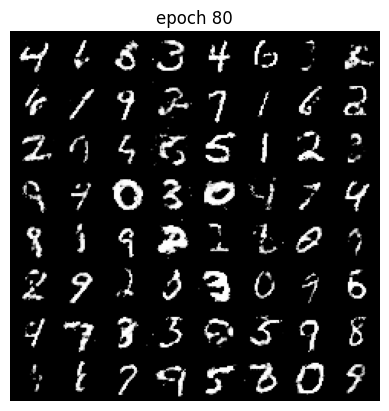

Epoch 80 of 100
Generator loss: 0.96311551, Discriminator loss: 1.23794222


938it [00:20, 45.76it/s]                                                        


Epoch 81 of 100
Generator loss: 0.96492875, Discriminator loss: 1.23148167


938it [00:20, 46.02it/s]                                                        


Epoch 82 of 100
Generator loss: 0.96153235, Discriminator loss: 1.23735762


938it [00:20, 45.56it/s]                                                        


Epoch 83 of 100
Generator loss: 0.96126932, Discriminator loss: 1.23341489


938it [00:20, 46.06it/s]                                                        


Epoch 84 of 100
Generator loss: 0.96224558, Discriminator loss: 1.23704028


938it [00:20, 46.76it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


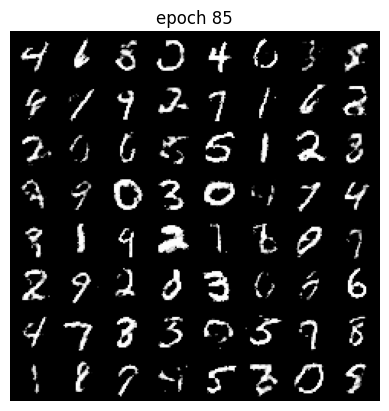

Epoch 85 of 100
Generator loss: 0.95786005, Discriminator loss: 1.23752487


938it [00:20, 46.51it/s]                                                        


Epoch 86 of 100
Generator loss: 0.96026278, Discriminator loss: 1.23222947


938it [00:20, 44.86it/s]                                                        


Epoch 87 of 100
Generator loss: 0.95689309, Discriminator loss: 1.23757529


938it [00:20, 46.15it/s]                                                        


Epoch 88 of 100
Generator loss: 0.95014179, Discriminator loss: 1.24015772


938it [00:20, 46.06it/s]                                                        


Epoch 89 of 100
Generator loss: 0.95684284, Discriminator loss: 1.23785734


938it [00:20, 45.82it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


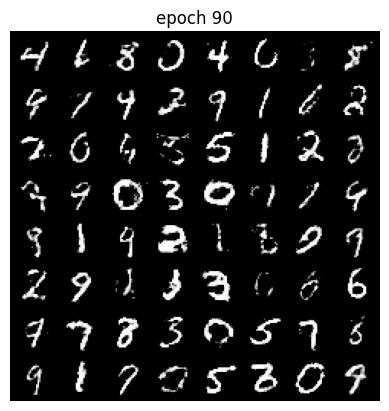

Epoch 90 of 100
Generator loss: 0.94860405, Discriminator loss: 1.24054837


938it [00:20, 46.26it/s]                                                        


Epoch 91 of 100
Generator loss: 0.95407146, Discriminator loss: 1.24500716


938it [00:20, 45.28it/s]                                                        


Epoch 92 of 100
Generator loss: 0.94598866, Discriminator loss: 1.24208796


938it [00:20, 46.39it/s]                                                        


Epoch 93 of 100
Generator loss: 0.94463050, Discriminator loss: 1.24075067


938it [00:20, 46.27it/s]                                                        


Epoch 94 of 100
Generator loss: 0.95148993, Discriminator loss: 1.23709321


938it [00:20, 46.56it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


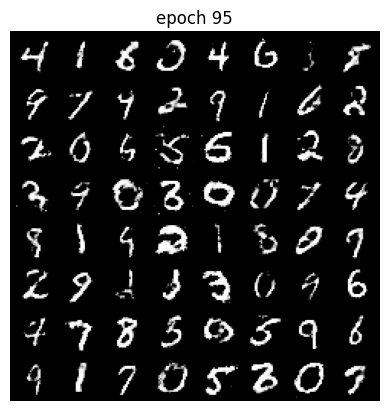

Epoch 95 of 100
Generator loss: 0.95979637, Discriminator loss: 1.23817205


938it [00:20, 46.31it/s]                                                        


Epoch 96 of 100
Generator loss: 0.94431818, Discriminator loss: 1.24478316


938it [00:20, 45.12it/s]                                                        


Epoch 97 of 100
Generator loss: 0.94777280, Discriminator loss: 1.24210358


938it [00:20, 46.08it/s]                                                        


Epoch 98 of 100
Generator loss: 0.93828809, Discriminator loss: 1.24623692


938it [00:20, 45.66it/s]                                                        


Epoch 99 of 100
Generator loss: 0.94456333, Discriminator loss: 1.24529564


938it [00:20, 46.72it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


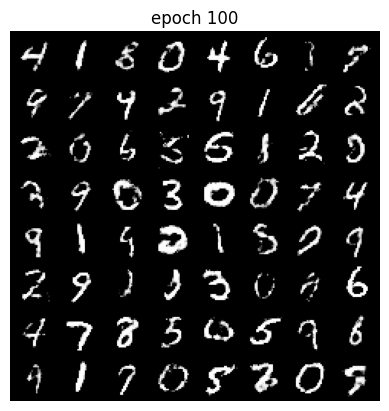

Epoch 100 of 100
Generator loss: 0.94061071, Discriminator loss: 1.24280643


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 

        optim_d.zero_grad()
        
        x, _ = data
        x = x.to(device)
        batch_size = x.size(0)

        z = create_noise(batch_size, nz)
        G_z = generator(z).detach()
    
        D_x = discriminator(x)
        D_G_z = discriminator(G_z)

        real_labels = label_real(batch_size)
        fake_labels = label_fake(batch_size)
        
        loss_d_on_x = discriminator_loss(D_x, real_labels)
        loss_d_on_G_z = discriminator_loss(D_G_z, fake_labels)

        loss_d_on_x_and_G_z = loss_d_on_x + loss_d_on_G_z
        
        loss_d_on_x_and_G_z.backward()
        optim_d.step()
        
        loss_d += loss_d_on_x_and_G_z

        optim_g.zero_grad()

        z = create_noise(batch_size, nz)
        G_z = generator(z)

        D_G_z = discriminator(G_z)

        batch_size = G_z.size(0)
        real_labels = label_real(batch_size)
        
        loss_g_on_G_z = generator_loss(D_G_z, real_labels)
        
        loss_g_on_G_z.backward()
        optim_g.step()
        
        loss_g += loss_g_on_G_z

        # Reference:
        # 1. S.R. Rath, "Generating MNIST Digit Images using Vanilla GAN with PyTorch", Aug 2020
        
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/c_gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.detach().cpu())
    losses_d.append(epoch_loss_d.detach().cpu())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/c_generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/c_generator_images.gif', imgs)

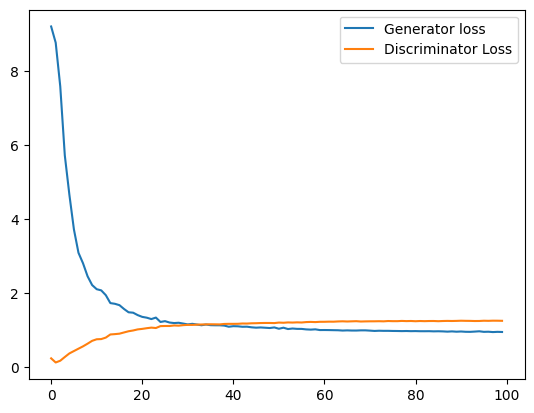

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/c_loss.png')